## 1° Problema de Negócio

#### Classificação - Problemas cardíacos

### Variáveis:

* HeartDisease(Doença cardíaca) = Yes, No
* BMI(IMC) = Float ou Contínuo
* Smoking(Você fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros])) = Yes, No
* AlcoholDrinking (Você bebe mais de 14 doses de álcool (homens) ou mais de 7 (mulheres) em uma semana?) = Yes, No
* Stroke(teve avc) = yes, No
* PhysicalHealth(Por quantos dias, nos últimos 30 dias, sua saúde física não foi boa?) = inteira ou discreta
* MentalHealth (For how many days during the past 30 days was your mental health not good?) = inteira ou discreta
* DiffWalking (Do you have serious difficulty walking or climbing stairs?) Yes, No
* Sex(sexo) = Categórico Female,Male
* AgeCategory(categoria de idade)18-24, 25-29...80 or older
* Race(Raça) = (Asian, White... Other)
* Diabetic(Você já teve diabetes?) Yes; No; No, borderline diabetes; Yes (during pregnancy)
* PhysicalActivity ( Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias fora do trabalho regular) Yes, No
* GenHealth (Você diria que, em geral, sua saúde é..) = Very good, Fair.
* SleepTime (Em média, quantas horas você dorme em um período de 24 horas?) = Contínuo
* Asthma (Asma) = Yes, No
* KidneyDisease(Doença renal) = Yes, No
* SkinCancer (Cancer de pele) Yes, No

fonte:https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [1]:
import pandas as pd
import numpy as nd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split,cross_val_score, GridSearchCV)
from imblearn.metrics import specificity_score
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, r2_score,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('base/heart_2020_cleaned.csv')

### 2° AED

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
#Skewnees -  Assimetria
#g1 = 0, a distribuição é simétrica;
#g1 > 0, a distribuição é assimétrica positiva (à direita);
#g1 < 0, a distribuição é assimétrica negativa (à esquerda).
#1) Verifique o sinal: se (-) assimetria à esquerda e se (+) assimetria à direita; 
#2) Se o seu valor estiver próximo de zero, isto é, dentro do intervalo [ -1 ,+ 1], os 
#dados serão mais simétricos, caso contrário, terão alto grau de assimetria.
df.skew()

BMI               1.332431
PhysicalHealth    2.603973
MentalHealth      2.331112
SleepTime         0.679035
dtype: float64

In [9]:
#Kurtosis - Curtose
##Curtose vai dizer o grau de achatamento da distruição normal
#Quando a curtose é igual a 3, eu tenho uma distribuição normal dos dados
#Todas estão abaixo da normal. Se tiver uma apenas, mesmo nesse caso temos que fazer a  
#normalização
df.kurt()

BMI               3.890043
PhysicalHealth    5.528450
MentalHealth      4.403937
SleepTime         7.854869
dtype: float64

In [12]:
#AED com dataprep
from dataprep.eda import create_report
create_report(df).show_browser()

100%|##############################################| 3/3 [00:00<?, ?it/s]

  0%|                                           | 0/2962 [00:00<?, ?it/s]

In [10]:
df.shape

(319795, 18)

### 3º Correção

### Após análise de datapred :
* Corrigir os campos categóricos;
* Fazer uma balancemanto de carga;
* Excluir valores repetidos

In [11]:
#Verificando os dados duplicados
df[df.duplicated(keep=False)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
24,No,25.75,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,Yes
41,No,28.13,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
46,No,33.23,No,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Very good,8.0,No,No,No
102,No,23.49,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,8.0,No,No,No
104,No,25.09,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [12]:
#Para deletar se tiver. Apenas o primeiro
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df[df.duplicated(keep=False)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [14]:
df.shape

(301717, 18)

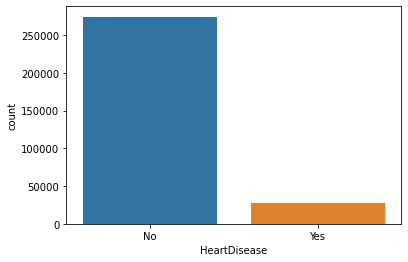

In [15]:
ax = sns.countplot(x=df['HeartDisease'])

### Fazer os encoders das variáveis:
* HeartDisease;
* Smoking;
* AlcoholDrinking;
* Stroke;
* DiffWalking;
* Sex;
* AgeCategory;
* Race;	
* Diabetic;	
* PhysicalActivity;	
* GenHealth;
* Asthma;
* KidneyDisease;	
* SkinCancer.

In [16]:
group = df.groupby(['HeartDisease']).size()
group

HeartDisease
No     274456
Yes     27261
dtype: int64

In [17]:
df1 = df.copy()

In [18]:
#HeartDisease
sexo = {'No':0,'Yes':1}
df1['HeartDisease'] = df['HeartDisease'].map(sexo)

In [19]:
group = df1.groupby(['HeartDisease']).size()
group

HeartDisease
0    274456
1     27261
dtype: int64

In [20]:
#Smoking
smoking = df1.groupby(['Smoking']).size()
smoking

Smoking
No     174312
Yes    127405
dtype: int64

In [21]:
smoking_map = {'No':0,'Yes':1}
df1['Smoking'] = df1['Smoking'].map(smoking_map)

In [22]:
#Smoking
smoking = df1.groupby(['Smoking']).size()
smoking

Smoking
0    174312
1    127405
dtype: int64

In [23]:
#AlcoholDrinking
alcohol_group = df1.groupby(['AlcoholDrinking']).size()
alcohol_group

AlcoholDrinking
No     280136
Yes     21581
dtype: int64

In [24]:
alcohol_map = {'No':0,'Yes':1}
df1['AlcoholDrinking'] = df1['AlcoholDrinking'].map(alcohol_map)

In [25]:
#AlcoholDrinking
alcohol_group = df1.groupby(['AlcoholDrinking']).size()
alcohol_group

AlcoholDrinking
0    280136
1     21581
dtype: int64

In [26]:
#Stroke
strokes_group = df1.groupby(['Stroke']).size()
strokes_group

Stroke
No     289653
Yes     12064
dtype: int64

In [27]:
stroke_map = {'No':0,'Yes':1}
df1['Stroke'] = df1['Stroke'].map(stroke_map)

In [28]:
strokes_group = df1.groupby(['Stroke']).size()
strokes_group

Stroke
0    289653
1     12064
dtype: int64

In [29]:
#DiffWalking
diffWalking_group = df1.groupby(['DiffWalking']).size()
diffWalking_group

DiffWalking
No     257362
Yes     44355
dtype: int64

In [30]:
diffWalking_map = {'No':0,'Yes':1}
df1['DiffWalking'] = df['DiffWalking'].map(diffWalking_map)

In [31]:
diffWalking_group = df1.groupby(['DiffWalking']).size()
diffWalking_group

DiffWalking
0    257362
1     44355
dtype: int64

In [32]:
#AgeCategory
agecategory_group = df1.groupby(['AgeCategory']).size()
agecategory_group

AgeCategory
18-24          19998
25-29          16312
30-34          17953
35-39          19526
40-44          19837
45-49          20518
50-54          23736
55-59          27610
60-64          31219
65-69          31670
70-74          29273
75-79          20713
80 or older    23352
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['AgeCategory'] = labelencoder.fit_transform(df1['AgeCategory'])

In [34]:
agecategory_group = df1.groupby(['AgeCategory']).size()
agecategory_group

AgeCategory
0     19998
1     16312
2     17953
3     19526
4     19837
5     20518
6     23736
7     27610
8     31219
9     31670
10    29273
11    20713
12    23352
dtype: int64

In [35]:
#Diabetic
diabetic_group = df1.groupby(['Diabetic']).size()
diabetic_group

Diabetic
No                         251796
No, borderline diabetes      6776
Yes                         40589
Yes (during pregnancy)       2556
dtype: int64

In [36]:
df1['Diabetic'] = labelencoder.fit_transform(df1['Diabetic'])

In [37]:
diabetic_group = df1.groupby(['Diabetic']).size()
diabetic_group

Diabetic
0    251796
1      6776
2     40589
3      2556
dtype: int64

In [38]:
#PhysicalActivity;
physicalactivity_group = df1.groupby(['PhysicalActivity']).size()
physicalactivity_group

PhysicalActivity
No      71305
Yes    230412
dtype: int64

In [39]:
physicalactivity_map = {'No':0,'Yes':1}
df1['PhysicalActivity'] = df1['PhysicalActivity'].map(physicalactivity_map)

In [40]:
physicalactivity_group = df1.groupby(['PhysicalActivity']).size()
physicalactivity_group

PhysicalActivity
0     71305
1    230412
dtype: int64

In [41]:
#GenHealth;
genhealth_group = df1.groupby(['GenHealth']).size() 
genhealth_group

GenHealth
Excellent     59737
Fair          34659
Good          91239
Poor          11286
Very good    104796
dtype: int64

In [42]:
df1['GenHealth'] =  labelencoder.fit_transform(df1['GenHealth'])

In [43]:
genhealth_group = df1.groupby(['GenHealth']).size() 
genhealth_group

GenHealth
0     59737
1     34659
2     91239
3     11286
4    104796
dtype: int64

In [44]:
#Asthma;
asthma_group = df1.groupby(['Asthma']).size()
asthma_group

Asthma
No     259066
Yes     42651
dtype: int64

In [45]:
asthma_map = {'No':0,'Yes':1}
df1['Asthma'] = df1['Asthma'].map(asthma_map)

In [46]:
asthma_group = df1.groupby(['Asthma']).size()
asthma_group

Asthma
0    259066
1     42651
dtype: int64

In [47]:
#KidneyDisease;
kidneydisease_group = df1.groupby(['KidneyDisease']).size()
kidneydisease_group

KidneyDisease
No     289941
Yes     11776
dtype: int64

In [48]:
kidneydisease_map = {'No':0,'Yes':1}
df1['KidneyDisease'] = df1['KidneyDisease'].map(kidneydisease_map)

In [49]:
kidneydisease_group = df1.groupby(['KidneyDisease']).size()
kidneydisease_group

KidneyDisease
0    289941
1     11776
dtype: int64

In [50]:
#SkinCancer.
skincancer_group = df1.groupby(['SkinCancer']).size()
skincancer_group

SkinCancer
No     272425
Yes     29292
dtype: int64

In [51]:
skincancer_map = {'No':0,'Yes':1}
df1['SkinCancer'] = df1['SkinCancer'].map(skincancer_map)

In [52]:
skincancer_group = df1.groupby(['SkinCancer']).size()
skincancer_group

SkinCancer
0    272425
1     29292
dtype: int64

In [53]:
#Sex
sexo_group = df1.groupby('Sex').size()
sexo_group

Sex
Female    159671
Male      142046
dtype: int64

In [54]:
#Race;
race_group = df1.groupby('Race').size()
race_group

Race
American Indian/Alaskan Native      5192
Asian                               7993
Black                              22810
Hispanic                           27107
Other                              10891
White                             227724
dtype: int64

In [55]:
df1 = pd.get_dummies(df1, columns=['Sex','Race'])

In [56]:
display(df1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,7,2,...,0,1,1,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,12,0,...,0,0,1,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,9,2,...,0,0,0,1,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,11,0,...,0,1,1,0,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,4,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,8,2,...,0,0,0,1,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,3,0,...,0,0,0,1,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,5,0,...,0,0,1,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


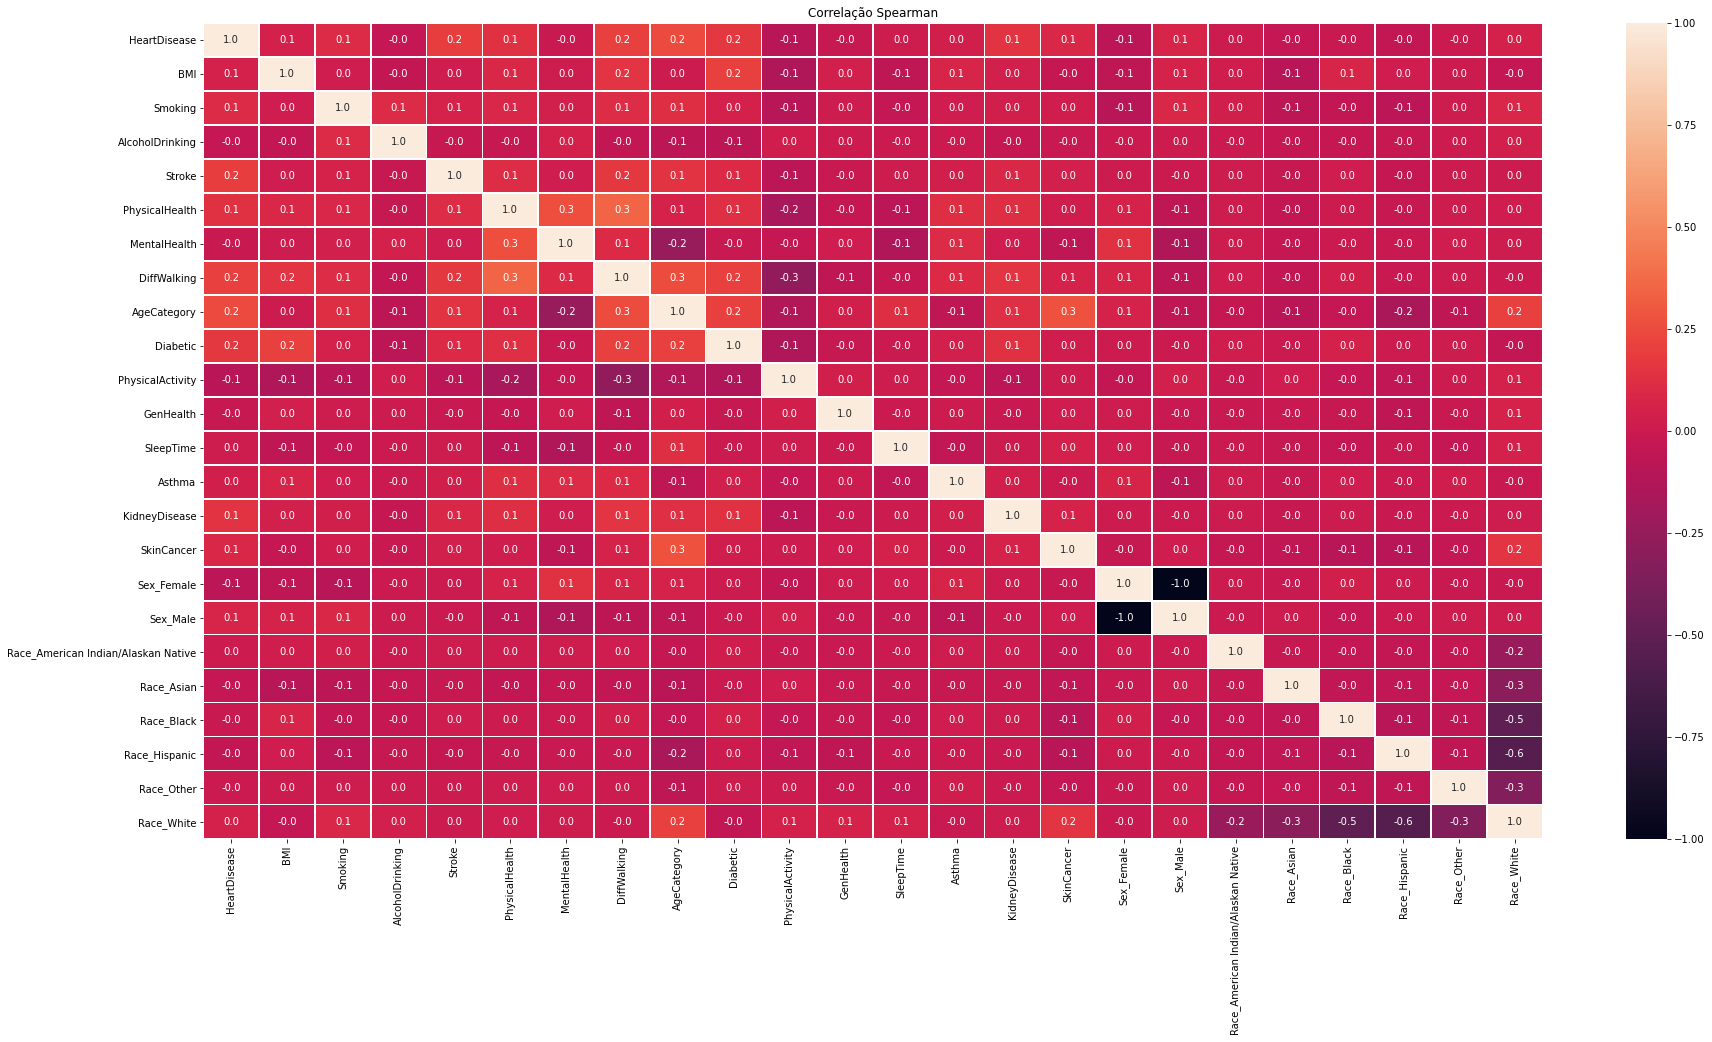

In [57]:
# Correlação Spearman para regressão 
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.heatmap(df1.corr(method='spearman'), annot = True, fmt=".1f", linewidths=.6)
ax.set_title('Correlação Spearman')
plt.show()

In [58]:
df1.corr()['HeartDisease']

HeartDisease                           1.000000
BMI                                    0.047260
Smoking                                0.104524
AlcoholDrinking                       -0.036289
Stroke                                 0.194665
PhysicalHealth                         0.165235
MentalHealth                           0.020913
DiffWalking                            0.196420
AgeCategory                            0.239259
Diabetic                               0.163686
PhysicalActivity                      -0.093597
GenHealth                             -0.012220
SleepTime                              0.010834
Asthma                                 0.035784
KidneyDisease                          0.142672
SkinCancer                             0.090644
Sex_Female                            -0.074435
Sex_Male                               0.074435
Race_American Indian/Alaskan Native    0.006480
Race_Asian                            -0.032841
Race_Black                            -0

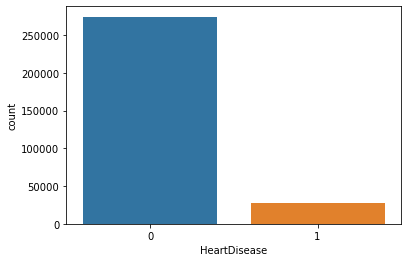

In [59]:
ax = sns.countplot(x=df1['HeartDisease'])

In [60]:
#Upsampling da minoria - aumentar a classe minoritária
from sklearn.utils import resample
mask = df1.HeartDisease == 1
surv_df = df1[mask]
death_df = df1[~mask]
df1_upsample = resample(surv_df,replace=True,n_samples=len(death_df),random_state=32,)
df1 = pd.concat([death_df, df1_upsample]) 

In [61]:
df1.HeartDisease.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

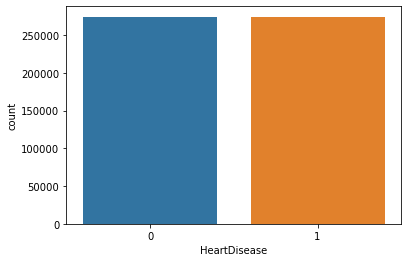

In [62]:
ax = sns.countplot(x=df1['HeartDisease'])

In [63]:
#Separando a variáveis preditores do alvo
X = df1.drop(['HeartDisease'], axis=1)
y = df1['HeartDisease']

In [64]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,16.60,1,0,0,3.0,30.0,0,7,2,1,...,0,1,1,0,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,12,0,1,...,0,0,1,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,9,2,1,...,0,0,0,1,0,0,0,0,0,1
3,24.21,0,0,0,0.0,0.0,0,11,0,0,...,0,1,1,0,0,0,0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,4,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126153,20.09,1,0,1,20.0,3.0,0,12,0,1,...,0,1,0,1,0,0,0,0,0,1
106593,36.58,1,0,0,0.0,0.0,0,12,2,0,...,0,1,0,1,0,0,0,0,0,1
62507,24.53,1,0,0,0.0,0.0,0,1,2,1,...,0,0,0,1,0,1,0,0,0,0
114463,26.58,1,0,0,0.0,0.0,0,11,2,1,...,0,0,0,1,0,0,0,0,0,1


In [65]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [66]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (384238, 23)
Shape dos dados de teste é (164674, 23)


In [67]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.5583709   1.00723525 -0.24776392  3.087109    2.33629633 -0.27554545
   1.74423488  0.37378651 -0.57175582 -1.54816641  0.58935657 -1.91547107
  -0.43505287 -0.29306553  2.52672992 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [-0.46761747  1.00723525 -0.24776392 -0.32392766 -0.54905417 -0.27554545
  -0.57331728 -1.6926675  -0.57175582 -1.54816641 -0.1409138  -0.06761652
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.01178781 -0.99281673 -0.24776392 -0.32392766 -0.54905417 -0.50690788
  -0.57331728  0.37378651 -0.57175582  0.6459254   1.31962695  0.548335
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.51714816  1.00723525 -0.247763

### 3° Construindo as Máquinas Preditivas

### Naive Bayes

In [68]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [69]:
#Vamos instanciar
nb = GaussianNB()

In [70]:
#Treinar
nb.fit(X_train, y_train)

GaussianNB()

In [71]:
nb.score(X_test, y_test)

0.7109987004627324

In [72]:
y_pred = nb.predict(X_test)

In [73]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
nb_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(nb_curva_roc,2)}')

Acurácia:0.71
Precisão:0.74
Recall ou Sensibilidade:0.65
Especificidade:0.77
F1-Score:0.69
Kappa:0.42
Curva ROC:0.71


### Regressão Logística

In [68]:
from sklearn.linear_model import LogisticRegression

In [75]:
#Vamos instanciar
lr = LogisticRegression(random_state=7,max_iter=1000)

In [76]:
#Treinar
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [77]:
lr.score(X_test, y_test)

0.748539538724996

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [78]:
cv_scores = cross_val_score(lr,X,y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.74468725 0.74673674 0.74655226 0.74724454 0.74656137]
Média dos Scores = 0.7463564310652184


In [79]:
#Obter a previsões
lr_previsoes = lr.predict(X_test)
lr_previsoes

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [80]:
lr_previsoes_prob = lr.predict_proba(X_test)
lr_previsoes_prob

array([[0.49097765, 0.50902235],
       [0.21754789, 0.78245211],
       [0.17649554, 0.82350446],
       ...,
       [0.8934339 , 0.1065661 ],
       [0.26550936, 0.73449064],
       [0.1908985 , 0.8091015 ]])

### Matriz de Confusão

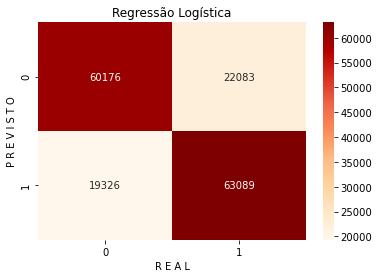

In [81]:
sns.heatmap(confusion_matrix(y_test, lr_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [82]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,lr_previsoes)
precisao = precision_score(y_test,lr_previsoes)
recall = recall_score(y_test,lr_previsoes)
specificity = specificity_score(y_test,lr_previsoes)
f1Score = f1_score(y_test,lr_previsoes)
lr_curva_roc = roc_auc_score(y_test,lr_previsoes)
kappa = cohen_kappa_score(y_test,lr_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.75
Precisão:0.74
Recall ou Sensibilidade:0.77
Especificidade:0.77
F1-Score:0.75
Kappa:0.5
Curva ROC:0.75


In [83]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     82259
           1       0.74      0.77      0.75     82415

    accuracy                           0.75    164674
   macro avg       0.75      0.75      0.75    164674
weighted avg       0.75      0.75      0.75    164674



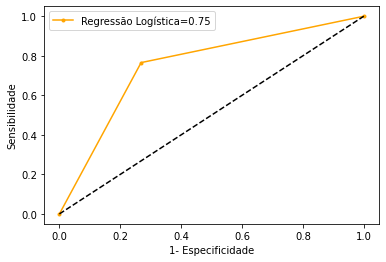

In [84]:
rl_fp,rl_vp,lim1 = roc_curve(y_test,lr_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

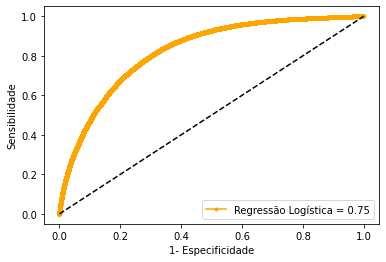

In [85]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_test,lr_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística = '+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### GridSearch Regressão Logística

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [87]:
parameters = {'C': [-3,3,7], 'penalty': ['l1', 'l2']}

In [88]:
logreg = LogisticRegression()

In [89]:
# Criar o objeto GridSearchCV
grid_search = GridSearchCV(logreg, parameters, cv = 5)

In [90]:
# Ajustar o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [-3, 3, 7], 'penalty': ['l1', 'l2']})

In [91]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'C': 3, 'penalty': 'l2'}


In [92]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.748539538724996


In [93]:
lg_best  = grid_search.best_estimator_

In [94]:
y_pred = lg_best.predict(X_test)

In [95]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
knc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.75
Precisão:0.74
Recall ou Sensibilidade:0.77
Especificidade:0.73
F1-Score:0.75
Kappa:0.5
Curva ROC:0.75


In [96]:
print(classification_report(y_test, lg_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     82259
           1       0.74      0.77      0.75     82415

    accuracy                           0.75    164674
   macro avg       0.75      0.75      0.75    164674
weighted avg       0.75      0.75      0.75    164674



### Máquina Vetor Suporte

In [69]:
from sklearn.svm import SVC

In [155]:
svc = SVC(random_state=7, probability=True)

In [ ]:
svc.fit(X_train, y_train)

In [68]:
svc.score(X_test, y_test)

0.730474148201096

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [69]:
cv_scores = cross_val_score(svc,X,y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.60600429 0.6042173  0.60576167 0.60154407 0.60218743]
Média dos Scores = 0.6039429520110537


In [70]:
#Obter a previsões
svc_previsoes = svc.predict(X_test)
svc_previsoes

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [71]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
svc_previsoes_prob = svc.predict_proba(X_test)
svc_previsoes_prob

array([[0.76853469, 0.23146531],
       [0.61538539, 0.38461461],
       [0.39242379, 0.60757621],
       ...,
       [0.47964112, 0.52035888],
       [0.60177267, 0.39822733],
       [0.47017284, 0.52982716]])

### Matriz de Confusão

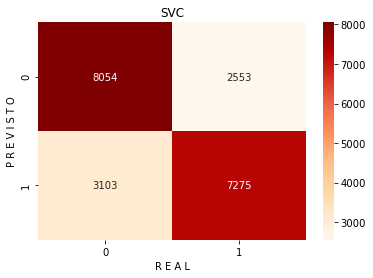

In [72]:
sns.heatmap(confusion_matrix(y_test, svc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [73]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,svc_previsoes)
precisao = precision_score(y_test,svc_previsoes)
recall = recall_score(y_test,svc_previsoes)
f1Score = f1_score(y_test,svc_previsoes)
svc_curva_roc = roc_auc_score(y_test,svc_previsoes)
kappa = cohen_kappa_score(y_test,svc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.7
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [74]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10607
           1       0.74      0.70      0.72     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



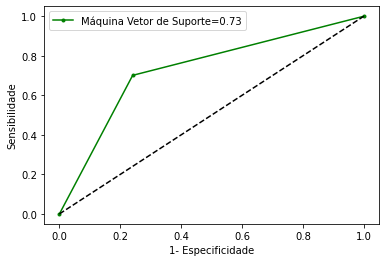

In [75]:
svc_fp,svc_vp,lim2 = roc_curve(y_test,svc_previsoes)
plt.plot(svc_fp,svc_vp, marker='.', label='Máquina Vetor de Suporte='+str(round(svc_curva_roc,2)),color="green")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

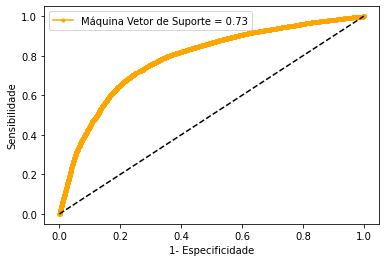

In [76]:
#Aqui estamos pegando apenas da classe 1
svc_probs = svc_previsoes_prob[:,1]
svc_fp,svc_vp,lim2 = roc_curve(y_test,svc_probs)
plt.plot(svc_fp,svc_vp, marker='.', label='Máquina Vetor de Suporte = '+str(round(svc_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### GridSearch  Máquina Vetor Suporte

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [78]:
# Definir os hiperparâmetros que você deseja ajustar
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10]}

In [79]:
# Inicializar o classificador SVC
svc = SVC()

In [80]:
# Criar o objeto GridSearchCV
svc_grid_search = GridSearchCV(svc, parameters,cv=5)

In [81]:
# Ajustar o modelo aos dados de treinamento
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [82]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", svc_grid_search.best_params_)

Melhores parâmetros encontrados:  {'C': 10, 'kernel': 'rbf'}


In [83]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = svc_grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.7322373123659757


In [84]:
svc_best  = svc_grid_search.best_estimator_

In [85]:
y_pred = svc_best.predict(X_test)

In [86]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
svc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.74
Recall ou Sensibilidade:0.71
F1-Score:0.72
Kappa:0.46
Curva ROC:0.73


In [87]:
print(classification_report(y_test, svc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     10607
           1       0.74      0.71      0.72     10378

    accuracy                           0.73     20985
   macro avg       0.73      0.73      0.73     20985
weighted avg       0.73      0.73      0.73     20985



### KNN

In [70]:
#Vamos importar
from sklearn.neighbors import KNeighborsClassifier

In [98]:
#Vamos instanciar
knn = KNeighborsClassifier()

In [99]:
#Treinar
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
knn.score(X_test, y_test)

0.8791976875523763

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [103]:
cv_scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.90251767 0.90024047 0.9021151  0.90165965 0.90725256 0.89881766
 0.90876464 0.89863548 0.90615948 0.90216975]
Média dos Scores = 0.9028332463279167


In [104]:
#Obter a previsões
knn_previsoes = knn.predict(X_test)
knn_previsoes

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [105]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
knn_previsoes_prob = knn.predict_proba(X_test)
knn_previsoes_prob

array([[1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

### Matriz de Confusão

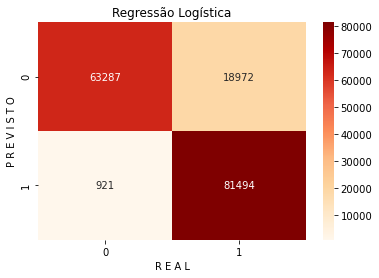

In [106]:
sns.heatmap(confusion_matrix(y_test, knn_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [107]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,knn_previsoes)
precisao = precision_score(y_test,knn_previsoes)
recall = recall_score(y_test,knn_previsoes)
specificity = specificity_score(y_test,knn_previsoes)
f1Score = f1_score(y_test,knn_previsoes)
knn_curva_roc = roc_auc_score(y_test,knn_previsoes)
kappa = cohen_kappa_score(y_test,knn_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knn_curva_roc,2)}')

Acurácia:0.88
Precisão:0.81
Recall ou Sensibilidade:0.99
Especificidade:0.73
F1-Score:0.89
Kappa:0.76
Curva ROC:0.88


In [108]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86     82259
           1       0.81      0.99      0.89     82415

    accuracy                           0.88    164674
   macro avg       0.90      0.88      0.88    164674
weighted avg       0.90      0.88      0.88    164674



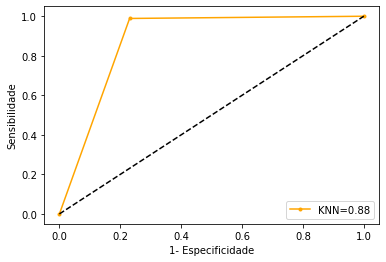

In [109]:
knn_fp,knn_vp,lim3 = roc_curve(y_test,knn_previsoes)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN='+str(round(knn_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

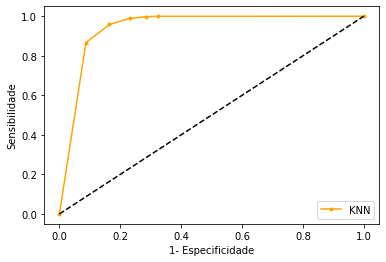

In [110]:
#Aqui estamos pegando apenas da classe 1
knn_probs = knn_previsoes_prob[:,1]
knn_fp,knn_vp,lim1 = roc_curve(y_test,knn_probs)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome ds eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search KNN

In [235]:
# Inicializar o classificador KNN
knn = KNeighborsClassifier()

In [236]:
parameters = {'n_neighbors': [3, 6, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [246]:
'''
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
}
'''

"\nparameters = {\n    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],\n    'weights': ['uniform', 'distance'],\n    'p': [1, 2],\n    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],\n    'leaf_size': [10, 20, 30],\n}\n"

In [237]:
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 6, 9],
                         'weights': ['uniform', 'distance']})

In [238]:
# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}


In [239]:
# Avaliar o desempenho do modelo com os parâmetros otimizados
accuracy = grid_search.score(X_test, y_test)
print("Acurácia do modelo otimizado: ", accuracy)

Acurácia do modelo otimizado:  0.9194286894105931


In [240]:
knn_best = grid_search.best_estimator_

In [241]:
#y_pred = grid_search.predict(X_test)
y_pred = knn_best.predict(X_test)

In [244]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
knc_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.92
Precisão:0.86
Recall ou Sensibilidade:1.0
Especificidade:0.84
F1-Score:0.93
Kappa:0.84
Curva ROC:0.92


In [245]:
print(classification_report(y_test, knn_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     82259
           1       0.86      1.00      0.93     82415

    accuracy                           0.92    164674
   macro avg       0.93      0.92      0.92    164674
weighted avg       0.93      0.92      0.92    164674



### Decision Tree - Árvore de decisão

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier(random_state=7, max_depth=7)

In [71]:
#Treinar
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=7)

In [72]:
dt.score(X_test, y_test)

0.7549886442304189

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [73]:
cv_scores = cross_val_score(dt,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.75781535 0.75371639 0.75256417 0.74908455 0.75440418 0.74453007
 0.76280265 0.74706236 0.75910441 0.74846514]
Média dos Scores = 0.7529549260685083


In [74]:
#Obter a previsões
dt_previsoes = dt.predict(X_test)
dt_previsoes

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [75]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
dt_previsoes_prob = dt.predict_proba(X_test)
dt_previsoes_prob

array([[0.57712171, 0.42287829],
       [0.25246164, 0.74753836],
       [0.28698507, 0.71301493],
       ...,
       [0.8834269 , 0.1165731 ],
       [0.15955213, 0.84044787],
       [0.22260956, 0.77739044]])

### Matriz de Confusão

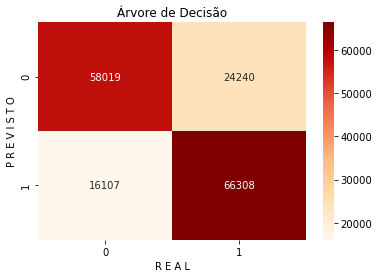

In [76]:
sns.heatmap(confusion_matrix(y_test, dt_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [78]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,dt_previsoes)
precisao = precision_score(y_test,dt_previsoes)
recall = recall_score(y_test,dt_previsoes)
specificity = specificity_score(y_test,dt_previsoes)
f1Score = f1_score(y_test,dt_previsoes)
dt_curva_roc = roc_auc_score(y_test,dt_previsoes)
kappa = cohen_kappa_score(y_test,dt_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.75
Precisão:0.73
Recall ou Sensibilidade:0.8
Especificidade:0.71
F1-Score:0.77
Kappa:0.51
Curva ROC:0.75


In [79]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74     82259
           1       0.73      0.80      0.77     82415

    accuracy                           0.75    164674
   macro avg       0.76      0.75      0.75    164674
weighted avg       0.76      0.75      0.75    164674



### Curva ROC

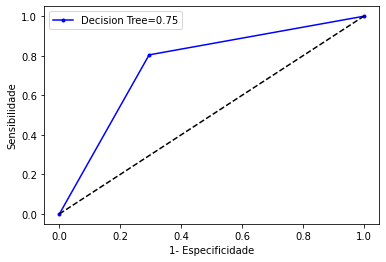

In [80]:
dt_fp,dt_vp,lim2 = roc_curve(y_test,dt_previsoes)
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

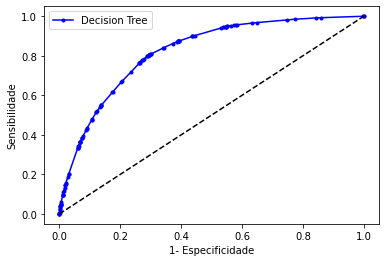

In [81]:
#Aqui estamos pegando apenas da classe 1
dt_probs = dt_previsoes_prob[:,1]
dt_fp,dt_vp,lim2 = roc_curve(y_test,dt_probs)
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search Decision Tree

In [82]:
# Definir os parâmetros para busca em grade
parameters = {'max_depth': [3, 6, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [83]:
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=7, random_state=7),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [84]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [85]:
dt_best = grid_search.best_estimator_

In [86]:
y_pred = dt_best.predict(X_test)

In [87]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
dt_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.76
Precisão:0.74
Recall ou Sensibilidade:0.8
Especificidade:0.72
F1-Score:0.77
Kappa:0.52
Curva ROC:0.76


### Floresta aleatória - RandomForest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(random_state=7, max_depth=7,n_estimators = 10)

In [90]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=7)

In [91]:
rf.score(X_test, y_test)

0.7537862686277129

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [92]:
cv_scores = cross_val_score(rf,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.75388035 0.74524521 0.75467745 0.7474085  0.75653568 0.74504017
 0.76160026 0.73906469 0.75671786 0.73824489]
Média dos Scores = 0.7498415056647617


In [93]:
#Obter a previsões
rf_previsoes = rf.predict(X_test)
rf_previsoes

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [94]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
rf_previsoes_prob = rf.predict_proba(X_test)
rf_previsoes_prob

array([[0.56081068, 0.43918932],
       [0.31185879, 0.68814121],
       [0.37899207, 0.62100793],
       ...,
       [0.74895054, 0.25104946],
       [0.31604973, 0.68395027],
       [0.2993537 , 0.7006463 ]])

### Matriz de Confusão

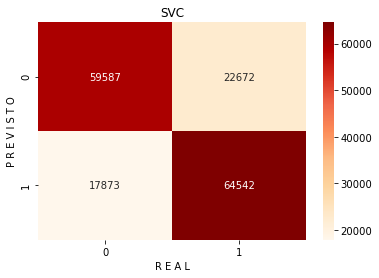

In [95]:
sns.heatmap(confusion_matrix(y_test, rf_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [96]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,rf_previsoes)
precisao = precision_score(y_test,rf_previsoes)
recall = recall_score(y_test,rf_previsoes)
specificity = specificity_score(y_test,rf_previsoes)
f1Score = f1_score(y_test,rf_previsoes)
rf_curva_roc = roc_auc_score(y_test,rf_previsoes)
kappa = cohen_kappa_score(y_test,rf_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.75
Precisão:0.74
Recall ou Sensibilidade:0.78
Especificidade:0.72
F1-Score:0.76
Kappa:0.51
Curva ROC:0.75


In [97]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     82259
           1       0.74      0.78      0.76     82415

    accuracy                           0.75    164674
   macro avg       0.75      0.75      0.75    164674
weighted avg       0.75      0.75      0.75    164674



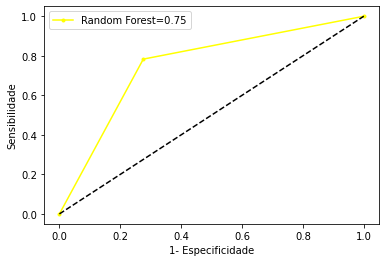

In [98]:
rf_fp,rf_vp,lim3 = roc_curve(y_test,rf_previsoes)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

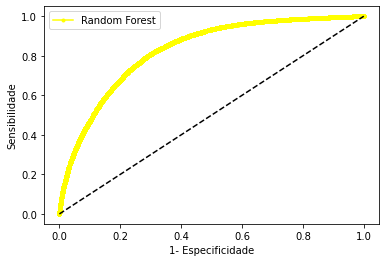

In [99]:
rf_probs = rf_previsoes_prob[:,1]
rf_fp,rf_vp,lim3 = roc_curve(y_test,rf_probs)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search Random Forest

In [100]:
parameters = {'n_estimators': [50, 100, 500],
              'max_depth': [3, 6, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [101]:
grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, n_estimators=10,
                                              random_state=7),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500]})

In [102]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [103]:
rf_best = grid_search.best_estimator_

In [104]:
y_pred = rf_best.predict(X_test)

In [105]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
rf_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.76
Precisão:0.74
Recall ou Sensibilidade:0.82
Especificidade:0.71
F1-Score:0.78
Kappa:0.53
Curva ROC:0.76


### Gradient Boosting

In [73]:
from sklearn.ensemble import  GradientBoostingClassifier

In [107]:
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=7)

In [108]:
grb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=7)

In [109]:
grb.score(X_test, y_test) 

0.7629680459574675

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [110]:
cv_scores = cross_val_score(grb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.76508417 0.7608759  0.76673772 0.75979669 0.76546246 0.75746479
 0.77234884 0.7526917  0.76497058 0.75744658]
Média dos Scores = 0.7622879416296533


In [111]:
#Obter a previsões
grb_previsoes = grb.predict(X_test)
grb_previsoes

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [112]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
grb_previsoes_prob = grb.predict_proba(X_test)
grb_previsoes_prob

array([[0.6424143 , 0.3575857 ],
       [0.3383604 , 0.6616396 ],
       [0.22691392, 0.77308608],
       ...,
       [0.8888257 , 0.1111743 ],
       [0.26792697, 0.73207303],
       [0.23057467, 0.76942533]])

### Matriz de Confusão

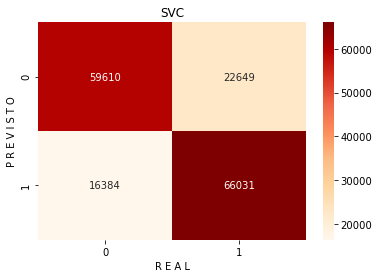

In [113]:
sns.heatmap(confusion_matrix(y_test, grb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [124]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,grb_previsoes)
precisao = precision_score(y_test,grb_previsoes)
recall = recall_score(y_test,grb_previsoes)
specificity = specificity_score(y_test,grb_previsoes)
f1Score = f1_score(y_test,grb_previsoes)
grb_curva_roc = roc_auc_score(y_test,grb_previsoes)
kappa = cohen_kappa_score(y_test,grb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(grb_curva_roc,2)}')

Acurácia:0.76
Precisão:0.74
Recall ou Sensibilidade:0.8
Especificidade:0.72
F1-Score:0.77
Kappa:0.53
Curva ROC:0.76


In [115]:
print(classification_report(y_test, grb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     82259
           1       0.74      0.80      0.77     82415

    accuracy                           0.76    164674
   macro avg       0.76      0.76      0.76    164674
weighted avg       0.76      0.76      0.76    164674



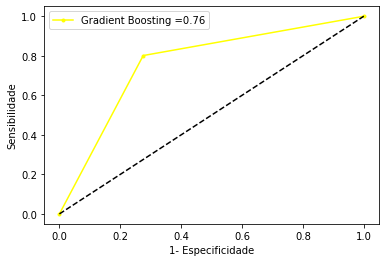

In [116]:
grb_fp,grb_vp,lim3 = roc_curve(y_test,grb_previsoes)
plt.plot(grb_fp,grb_vp, marker='.', label='Gradient Boosting ='+str(round(grb_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

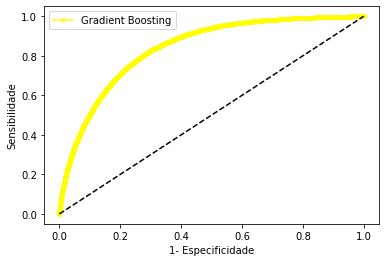

In [117]:
grb_probs = grb_previsoes_prob[:,1]
grb_fp,grb_vp,lim3 = roc_curve(y_test,grb_probs)
plt.plot(grb_fp,grb_vp, marker='.', label='Gradient Boosting',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Gradient Boosting Grid Search

In [118]:
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 6, 9]}

In [119]:
# Realizar a busca em grade
grid_search = GridSearchCV(grb, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]})

In [120]:
# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}


In [121]:
grb_best = grid_search.best_estimator_

In [122]:
y_pred = grb_best.predict(X_test)

In [126]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
grb_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(grb_curva_roc,2)}')

Acurácia:0.82
Precisão:0.8
Recall ou Sensibilidade:0.86
Especificidade:0.78
F1-Score:0.83
Kappa:0.64
Curva ROC:0.82


### XGBoost

In [74]:
#Importando
import xgboost as xgb

In [128]:
xgb = xgb.XGBClassifier(random_state=7) 

In [129]:
#eval_set=[(X_test, y_test)] aqui eu já valido com o teste,
#mas o ideal e fazer sem o X_test. Depois testamos, mas para experimento eu fiz
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.61495
[1]	validation_0-logloss:0.57060
[2]	validation_0-logloss:0.54430
[3]	validation_0-logloss:0.52757
[4]	validation_0-logloss:0.51635
[5]	validation_0-logloss:0.50850
[6]	validation_0-logloss:0.50306
[7]	validation_0-logloss:0.49860
[8]	validation_0-logloss:0.49544
[9]	validation_0-logloss:0.49347
[10]	validation_0-logloss:0.49130
[11]	validation_0-logloss:0.48996
[12]	validation_0-logloss:0.48877
[13]	validation_0-logloss:0.48784
[14]	validation_0-logloss:0.48711
[15]	validation_0-logloss:0.48644
[16]	validation_0-logloss:0.48560
[17]	validation_0-logloss:0.48517
[18]	validation_0-logloss:0.48460
[19]	validation_0-logloss:0.48387
[20]	validation_0-logloss:0.48342
[21]	validation_0-logloss:0.48298
[22]	validation_0-logloss:0.48254
[23]	validation_0-logloss:0.48195
[24]	validation_0-logloss:0.48131
[25]	validation_0-logloss:0.48101
[26]	validation_0-logloss:0.48088
[27]	validation_0-logloss:0.48035
[28]	validation_0-logloss:0.48003
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [132]:
xgb.score(X_test, y_test) 

0.7806453963588667

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [133]:
cv_scores = cross_val_score(xgb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.78393937 0.77874736 0.7822776  0.77730411 0.78295167 0.77504509
 0.78869031 0.77120111 0.7846095  0.77648431]
Média dos Scores = 0.7801250429273827


In [134]:
#Obter a previsões
xgb_previsoes = xgb.predict(X_test)
xgb_previsoes

array([0, 1, 1, ..., 0, 1, 1])

In [135]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
xgb_previsoes_prob = xgb.predict_proba(X_test)
xgb_previsoes_prob

array([[0.6582199 , 0.34178013],
       [0.41327667, 0.5867233 ],
       [0.1845612 , 0.8154388 ],
       ...,
       [0.9245592 , 0.0754408 ],
       [0.34603345, 0.65396655],
       [0.16936553, 0.8306345 ]], dtype=float32)

### Matriz de Confusão

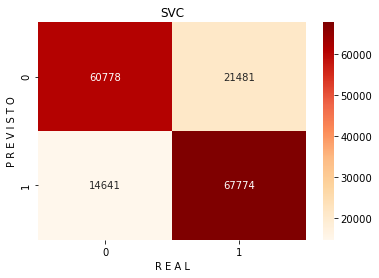

In [136]:
sns.heatmap(confusion_matrix(y_test, xgb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [137]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,xgb_previsoes)
precisao = precision_score(y_test,xgb_previsoes)
recall = recall_score(y_test,xgb_previsoes)
specificity = specificity_score(y_test,xgb_previsoes)
f1Score = f1_score(y_test,xgb_previsoes)
xgb_curva_roc = roc_auc_score(y_test,xgb_previsoes)
kappa = cohen_kappa_score(y_test,xgb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.78
Precisão:0.76
Recall ou Sensibilidade:0.82
Especificidade:0.74
F1-Score:0.79
Kappa:0.56
Curva ROC:0.78


In [138]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     82259
           1       0.76      0.82      0.79     82415

    accuracy                           0.78    164674
   macro avg       0.78      0.78      0.78    164674
weighted avg       0.78      0.78      0.78    164674



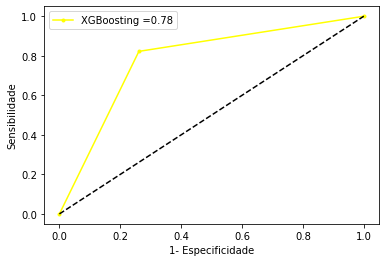

In [139]:
xgb_fp,xgb_vp,lim3 = roc_curve(y_test,xgb_previsoes)
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoosting ='+str(round(xgb_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

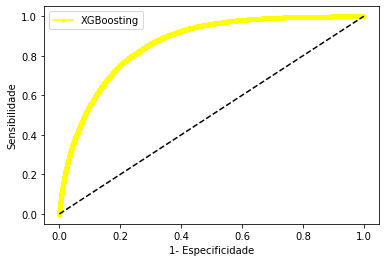

In [140]:
xgb_probs = xgb_previsoes_prob[:,1]
xgb_fp,xgb_vp,lim3 = roc_curve(y_test,xgb_probs)
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoosting',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Grid Search XGBoost

In [154]:
import xgboost as xgb

In [146]:
# Definindo os parâmetros para grid search
parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500]
}

In [152]:
# Definindo os parâmetros para grid search
#Muito pesada para minha maquina
'''parameters = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'min_child_weight': [1, 5, 10],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0]   
    
}'''

In [155]:
xgb = xgb.XGBClassifier(random_state=7)

In [ ]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(xgb, parameters, scoring='accuracy', cv=5)

# Realizando o grid search para encontrar os melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

In [ ]:
# Obtendo as previsões do modelo com os melhores hiperparâmetros
xgb_best = grid_search.best_estimator_

In [ ]:
y_pred = xgb_best.predict(X_test)

In [151]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
xgb_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.84
Precisão:0.81
Recall ou Sensibilidade:0.89
Especificidade:0.79
F1-Score:0.85
Kappa:0.69
Curva ROC:0.84


### Seleção de características e Aprendizado de Máquina

Nesta seção, selecionaremos recursos com métodos diferentes que são seleção de recursos com correlação, eliminação de recurso recursivo (RFE) e eliminação de recurso recursivo com validação cruzada (RFECV). Usaremos a classificação Random Forest para treinar nosso modelo.

### 1 - Recursive feature elimination (RFE) with Random Forest

RFE usa um dos métodos de classificação (floresta aleatória) que atribui pesos a cada recurso. Os menores pesos são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto podado até que o número desejado de recursos seja alcançado.

In [89]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  recall_score

In [90]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
# Se eu não colocar o columns=X.columns eu não vou conseguir selecionar as melhores features
data_normalizado = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [91]:
data_normalizado.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

In [ ]:
display(data_normalizado)

In [92]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(data_normalizado ,y, test_size=0.3, random_state = 7) 

In [93]:
# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=7)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [94]:
print('Atributos abordagem rfe:',X.columns[rfe.support_])

Atributos abordagem rfe: Index(['BMI', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking',
       'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'Sex_Male'],
      dtype='object')


Recall is:  0.9961293453861554
Accuracy is:  0.9467128994255316
F1 score is:  0.9492677794030074


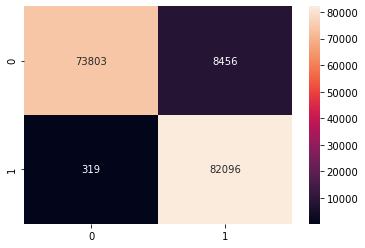

In [95]:
recall = recall_score(y_test,rfe.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

### 2 - Recursive feature elimination with cross validation and Random Forest classification

In [ ]:
display(data_normalizado)

In [97]:
#from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(random_state=7) 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Sex_Female', 'Sex_Male',
       'Race_American Indian/Alaskan Native', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White'],
      dtype='object')


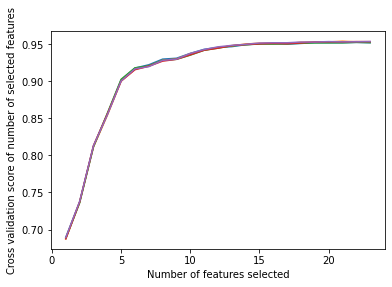

In [98]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Recall is:  0.9993447794697567
Accuracy is:  0.9635036496350365
F1 score is:  0.964798631773774


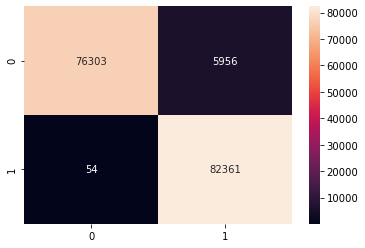

In [99]:
recall = recall_score(y_test,rfecv.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfecv.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfecv.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfecv.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

###  Utilizando abordagem Filtro

In [129]:
# Import the necessary libraries first
import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Parâmetro K é número de TOP features

In [132]:
#selector = SelectKBest(score_func=chi2, k=18)
selector = SelectKBest(score_func=mutual_info_classif,k=16)
#selector = SelectKBest(score_func=f_classif, k=42)

In [133]:
#selector.fit(data_normal, y)
selector.fit(X_train, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
print(cols)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [103]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [104]:
from sklearn.ensemble import  GradientBoostingClassifier

Recall is:  0.8481829763999272
Accuracy is:  0.7419082550979511
F1 score is:  0.7668712665997466


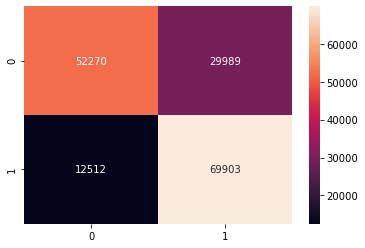

In [105]:
#random forest classifier with n_estimators=10 (default)
grb = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,random_state=7)
grb = grb.fit(X_train,y_train)
#clf_rf = RandomForestClassifier(random_state=42)      
#clr_rf = clf_rf.fit(X_train,y_train)
recall = recall_score(y_test,grb.predict(X_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,grb.predict(X_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,grb.predict(X_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,grb.predict(X_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

### Utilizando abordagem abordagem Prof. De Boas. rsrsrsrsrsr

In [97]:
#X = df1[['BMI','Smoking','AlcoholDrinking','Stroke', 'PhysicalHealth','MentalHealth', 
#         'DiffWalking','AgeCategory', 'Diabetic','PhysicalActivity', 'SleepTime', 
#         'Sex_Male','Sex_Female']]
X=df1[['BMI','Smoking','AlcoholDrinking','Stroke', 'PhysicalHealth','MentalHealth', 
         'DiffWalking','AgeCategory', 'Diabetic','PhysicalActivity', 'KidneyDisease', 
         'Sex_Male','Sex_Female','SkinCancer','SleepTime']]

y = df1['HeartDisease']

In [98]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease,Sex_Male,Sex_Female,SkinCancer,SleepTime
0,16.60,1,0,0,3.0,30.0,0,7,2,1,0,0,1,1,5.0
1,20.34,0,0,1,0.0,0.0,0,12,0,1,0,0,1,0,7.0
2,26.58,1,0,0,20.0,30.0,0,9,2,1,0,1,0,0,8.0
3,24.21,0,0,0,0.0,0.0,0,11,0,0,0,0,1,1,6.0
4,23.71,0,0,0,28.0,0.0,1,4,0,1,0,0,1,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126153,20.09,1,0,1,20.0,3.0,0,12,0,1,0,1,0,1,12.0
106593,36.58,1,0,0,0.0,0.0,0,12,2,0,0,1,0,1,8.0
62507,24.53,1,0,0,0.0,0.0,0,1,2,1,0,1,0,0,6.0
114463,26.58,1,0,0,0.0,0.0,0,11,2,1,0,1,0,0,8.0


In [99]:
y

0         0
1         0
2         0
3         0
4         0
         ..
126153    1
106593    1
62507     1
114463    1
45360     1
Name: HeartDisease, Length: 548912, dtype: int64

In [100]:
#Importando
from sklearn.neighbors import KNeighborsClassifier

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [102]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 

In [103]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', n_neighbors = 3, weights = 'distance')

In [104]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')

In [105]:
knn.score(X_test, y_test) 

0.9156636748970693

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados.

In [106]:
cv_scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.91723748 0.91087955 0.91607003 0.91266328 0.91477656 0.91320982
 0.9165437  0.91100545 0.91410249 0.91233536]
Média dos Scores = 0.9138823703029096


In [107]:
#Obter a previsões
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [108]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
knn_previsoes_prob = knn.predict_proba(X_test)
knn_previsoes_prob

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.62732919, 0.37267081],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [112]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
knn_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knn_curva_roc,2)}')


Acurácia:0.92
Precisão:0.86
Recall ou Sensibilidade:0.99
Especificidade:0.84
F1-Score:0.92
Kappa:0.83
Curva ROC:0.92


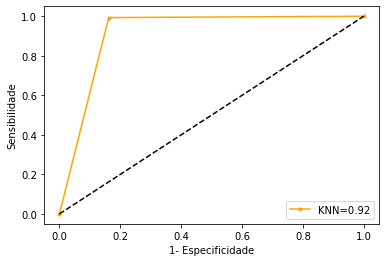

In [110]:
knn_fp,knn_vp,lim3 = roc_curve(y_test,y_pred)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN='+str(round(knn_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

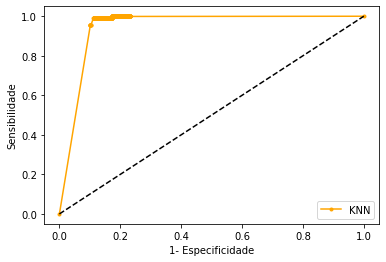

In [111]:
#Aqui estamos pegando apenas da classe 1
knn_probs = knn_previsoes_prob[:,1]
knn_fp,knn_vp,lim1 = roc_curve(y_test,knn_probs)
plt.plot(knn_fp,knn_vp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome ds eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

### Feature Importance with XGBoost

In [161]:
#Importando
import xgboost as xgb
from xgboost import plot_importance

In [162]:
xgb = xgb.XGBClassifier(random_state=7) 

In [163]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [164]:
xgb.score(X_test, y_test) 

0.7738015715899292

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

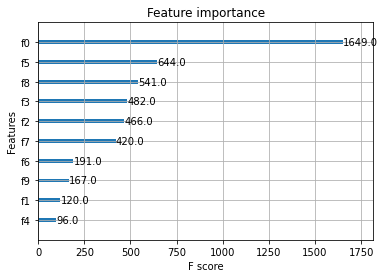

In [165]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_importance(xgb, ax=ax)

In [171]:
import xgboost as xgb

In [172]:
X = df1[['BMI', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking',
       'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime']]
y = df1['HeartDisease']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [174]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 

In [175]:
xgb = xgb.XGBClassifier(random_state=7) 

In [176]:
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.61820
[1]	validation_0-logloss:0.57752
[2]	validation_0-logloss:0.55249
[3]	validation_0-logloss:0.53736
[4]	validation_0-logloss:0.52777
[5]	validation_0-logloss:0.52100
[6]	validation_0-logloss:0.51634
[7]	validation_0-logloss:0.51339
[8]	validation_0-logloss:0.51119
[9]	validation_0-logloss:0.50937
[10]	validation_0-logloss:0.50818
[11]	validation_0-logloss:0.50697
[12]	validation_0-logloss:0.50612
[13]	validation_0-logloss:0.50545
[14]	validation_0-logloss:0.50493
[15]	validation_0-logloss:0.50449
[16]	validation_0-logloss:0.50385
[17]	validation_0-logloss:0.50327
[18]	validation_0-logloss:0.50267
[19]	validation_0-logloss:0.50218
[20]	validation_0-logloss:0.50188
[21]	validation_0-logloss:0.50179
[22]	validation_0-logloss:0.50173
[23]	validation_0-logloss:0.50162
[24]	validation_0-logloss:0.50127
[25]	validation_0-logloss:0.50078
[26]	validation_0-logloss:0.50042
[27]	validation_0-logloss:0.49970
[28]	validation_0-logloss:0.49935
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
xgb.score(X_test, y_test) 
#Obs: Testei com os dados normalizados, mas não houve melhora

0.7377174172027638

In [119]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
#scaler = MinMaxScaler()
scaller = StandardScaler()
# fit and transform the data
# Se eu não colocar o columns=X.columns eu não vou conseguir selecionar as melhores features
data_normalizado = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data_normalizado ,y, test_size=0.3, random_state = 7) 

In [121]:
X_train

,idade,peso,altura,p_sistolica,p_diastolica,colesterol
14995,0.857530,0.352632,0.523077,0.007429,0.007182,0.0
26692,0.515834,0.315789,0.594872,0.006180,0.007182,0.0
30431,0.689818,0.289474,0.610256,0.007429,0.007182,0.0
34426,0.296942,0.273684,0.538462,0.006180,0.005364,0.0
51229,0.737979,0.226316,0.620513,0.006804,0.007182,0.0
...,...,...,...,...,...,...
53459,0.735501,0.478947,0.482051,0.009301,0.009001,1.0
10742,0.862176,0.315789,0.610256,0.005556,0.005364,0.0
49689,0.746806,0.278947,0.543590,0.008677,0.007182,0.0
58564,0.741463,0.363158,0.605128,0.009301,0.009001,1.0


In [124]:
xgb = xgb.XGBClassifier() 

In [125]:
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62452
[1]	validation_0-logloss:0.58862
[2]	validation_0-logloss:0.56903
[3]	validation_0-logloss:0.55800
[4]	validation_0-logloss:0.55203
[5]	validation_0-logloss:0.54838
[6]	validation_0-logloss:0.54651
[7]	validation_0-logloss:0.54541
[8]	validation_0-logloss:0.54473
[9]	validation_0-logloss:0.54452
[10]	validation_0-logloss:0.54447
[11]	validation_0-logloss:0.54467
[12]	validation_0-logloss:0.54465
[13]	validation_0-logloss:0.54478
[14]	validation_0-logloss:0.54472
[15]	validation_0-logloss:0.54484
[16]	validation_0-logloss:0.54502
[17]	validation_0-logloss:0.54505
[18]	validation_0-logloss:0.54513
[19]	validation_0-logloss:0.54518
[20]	validation_0-logloss:0.54543


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [177]:
xgb.score(X_test, y_test) 
#Obs: Testei com os dados normalizados, mas não houve melhora

0.7650630943561217

### Randomized Search

In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
parameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [100, 500, 1000, 2000]
}

In [180]:
# Criando o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, parameters, n_iter=10, scoring='accuracy', cv=5, 
                                   random_state=7)

In [194]:
#Separando a variáveis preditores do alvo
X = df1.drop(['HeartDisease'], axis=1)
y = df1['HeartDisease']

In [195]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,16.60,1,0,0,3.0,30.0,0,7,2,1,...,0,1,1,0,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,12,0,1,...,0,0,1,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,9,2,1,...,0,0,0,1,0,0,0,0,0,1
3,24.21,0,0,0,0.0,0.0,0,11,0,0,...,0,1,1,0,0,0,0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,4,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126153,20.09,1,0,1,20.0,3.0,0,12,0,1,...,0,1,0,1,0,0,0,0,0,1
106593,36.58,1,0,0,0.0,0.0,0,12,2,0,...,0,1,0,1,0,0,0,0,0,1
62507,24.53,1,0,0,0.0,0.0,0,1,2,1,...,0,0,0,1,0,1,0,0,0,0
114463,26.58,1,0,0,0.0,0.0,0,11,2,1,...,0,0,0,1,0,0,0,0,0,1


In [196]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [197]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (384238, 23)
Shape dos dados de teste é (164674, 23)


In [198]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.5583709   1.00723525 -0.24776392  3.087109    2.33629633 -0.27554545
   1.74423488  0.37378651 -0.57175582 -1.54816641  0.58935657 -1.91547107
  -0.43505287 -0.29306553  2.52672992 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [-0.46761747  1.00723525 -0.24776392 -0.32392766 -0.54905417 -0.27554545
  -0.57331728 -1.6926675  -0.57175582 -1.54816641 -0.1409138  -0.06761652
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.01178781 -0.99281673 -0.24776392 -0.32392766 -0.54905417 -0.50690788
  -0.57331728  0.37378651 -0.57175582  0.6459254   1.31962695  0.548335
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.51714816  1.00723525 -0.247763

In [199]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=7,
                                           reg_alpha=0, reg_lambda=1, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 500, 1000, 2000]},
                   random_state=7, scoring='accuracy')

In [200]:
# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

Melhores hiperparâmetros encontrados:
{'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 1}


In [201]:
rand_xgb_best  = random_search.best_estimator_

In [202]:
y_pred = rand_xgb_best.predict(X_test)

### Matriz de Confusão

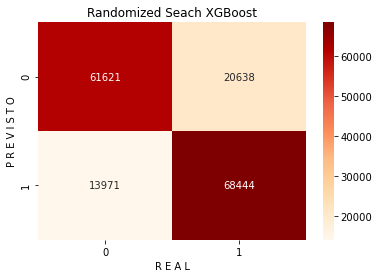

In [203]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Randomized Seach XGBoost')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [204]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
rs_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rs_curva_roc,2)}')

Acurácia:0.79
Precisão:0.77
Recall ou Sensibilidade:0.83
Especificidade:0.75
F1-Score:0.8
Kappa:0.58
Curva ROC:0.79


In [205]:
print(classification_report(y_test, rand_xgb_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     82259
           1       0.77      0.83      0.80     82415

    accuracy                           0.79    164674
   macro avg       0.79      0.79      0.79    164674
weighted avg       0.79      0.79      0.79    164674



### Voting Regressor

In [75]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

In [76]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 7) 

In [77]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


#minmax = MinMaxScaler()
#X_train = minmax.fit_transform(X_train)
#X_test = minmax.transform(X_test) 


print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.5583709   1.00723525 -0.24776392  3.087109    2.33629633 -0.27554545
   1.74423488  0.37378651 -0.57175582 -1.54816641  0.58935657 -1.91547107
  -0.43505287 -0.29306553  2.52672992 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [-0.46761747  1.00723525 -0.24776392 -0.32392766 -0.54905417 -0.27554545
  -0.57331728 -1.6926675  -0.57175582 -1.54816641 -0.1409138  -0.06761652
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.01178781 -0.99281673 -0.24776392 -0.32392766 -0.54905417 -0.50690788
  -0.57331728  0.37378651 -0.57175582  0.6459254   1.31962695  0.548335
  -0.43505287 -0.29306553 -0.39576846 -0.95362936  0.95362936 -0.13596223
  -0.13960046 -0.27462211 -0.28117531 -0.18725748  0.52262561]
 [ 0.51714816  1.00723525 -0.247763

In [81]:
r1 = LogisticRegression(C = 3, penalty = 'l2')
r2 = RandomForestClassifier(max_depth = 9, max_features = 'auto', min_samples_leaf = 2, 
                            min_samples_split = 2,n_estimators = 100)
r3 = KNeighborsClassifier(algorithm = 'kd_tree', n_neighbors = 3, weights = 'distance')
r4 = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 1, min_samples_split = 2)
r5 = SVC()
r6 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 200)
r7 = xgb.XGBClassifier()  
er1 = VotingClassifier([('r1', r1), ('r2', r2), ('r3', r3),('r4', r4),('r5', r5),('r6', r6),('r7', r7)])
er1.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', LogisticRegression(C=3)),
                             ('r2',
                              RandomForestClassifier(max_depth=9,
                                                     max_features='auto',
                                                     min_samples_leaf=2)),
                             ('r3',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=3,
                                                   weights='distance')),
                             ('r4', DecisionTreeClassifier(max_depth=9)),
                             ('r5', SVC()),
                             ('r6',
                              GradientBoostingClassifier(max_depth=9,
                                                         n_estimators=200)),
                             ('r7',...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...))])

In [82]:
y_pred = er1.predict(X_test)

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [83]:
cv_scores = cross_val_score(er1,X,y, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.78724393 0.78638769 0.78455485 0.78603961 0.78468237]
Média dos Scores = 0.7857816880151232


### Matriz de Confusão

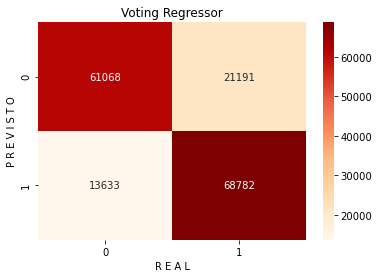

In [84]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Voting Regressor')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [85]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
votting_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(votting_curva_roc,2)}')

Acurácia:0.79
Precisão:0.76
Recall ou Sensibilidade:0.83
Especificidade:0.74
F1-Score:0.8
Kappa:0.58
Curva ROC:0.79


In [86]:
print(classification_report(y_test, er1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     82259
           1       0.76      0.83      0.80     82415

    accuracy                           0.79    164674
   macro avg       0.79      0.79      0.79    164674
weighted avg       0.79      0.79      0.79    164674



### Segundo o Pycaret o melhor é o lightgbm

In [1]:
!pip install lightgbm

In [230]:
from lightgbm import LGBMClassifier

In [231]:
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [232]:
# Treinar o modelo
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=5, random_state=7)

In [233]:
y_pred = lgbm.predict(X_test)

In [234]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
specificity = specificity_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
lgbm_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lgbm_curva_roc,2)}')

Acurácia:0.77
Precisão:0.74
Recall ou Sensibilidade:0.82
Especificidade:0.72
F1-Score:0.78
Kappa:0.53
Curva ROC:0.77


## Referências

* Grid Search with Logistic Regression. Disponível em: https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression. Acesso em 30/05/2023.
* sklearn.model_selection.GridSearchCV. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. Acesso em 30/05/2023.